# Using Log Plotter

---

Cells below are the example of using `plotter` function to generate plots for selected logs.



In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder


def discrete_cmap(N, base_cmap=None):
    """Extract discrete colors from cmap"""
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


def plotter(data, depth_col, num_col=None, cat_col=None, cat_classes=None, figsize=(8, 12), base_cmap='hsv'):
    """
    Plot log data.
    
    Parameters
    ----------
        data : pandas dataframe
            Well log data in pandas dataframe. Depth column is required.
        depth_col : single value integer in list
            Column index of depth in data.
        num_col : single or multiple integers in list
            Numeric log indices in data. Eg, GR, Resistivity, etc. Skip if do not
            intend to plot numeric data.
        cat_col : single or multiple integers in list
            Categorical log indices in data. Eg, Facies, Formation, etc. Skip if do not
            intend to plot numeric data.
        cat_classes : list of strings/discrete entity in list
            List of all classes according to cat_col order. Eg, if cat_col = [0, 1]
            referring to Facies and Formation respectively, where both have 2 and 3
            classes respectively:
                >> cat_classes = [['SS','SH'], ['Seligi','Raya','Serudon']]
        figsize : tuple
            Graph object figure size in tuple of (row, column) size in inches.
        base_cmap : matplotlib cmap string
            Colormap for categorical data.
          
    Return
    ------
        No return. Only will prompt matplotlib.pyplot graph object.
    """
    
    # set up plt chart
    num_C = len(num_col) if not num_col is None else 0
    cat_C = len(cat_col) if not cat_col is None else 0
    C = num_C + cat_C
    fig, ax = plt.subplots(nrows=1, ncols=C, figsize=figsize)
    
    # depth
    depth_header = data.columns[depth_col].tolist()
    data = data.sort_values(by=depth_header)
    depth_data = data[depth_header].values
    depth_trim = max(depth_data), min(depth_data)
    
    # numeric data
    if not num_col is None:
        num_header = data.iloc[:, num_col].columns.tolist()
        num_data = data.iloc[:, num_col].values
        for i in range(num_C):
            ax[i].plot(num_data[:, i], depth_data)
            ax[i].set_xlabel(num_header[i])
            ax[i].invert_yaxis()
            ax[i].set_ylim(depth_trim)
        
    # categorical data
    if not cat_col is None:
        cat_header = data.iloc[:, cat_col].columns.tolist()
        cat_data = data.iloc[:, cat_col].values
        for i in range(cat_C):
            j = i + num_C
            x = cat_data[:, i]
            le = LabelEncoder()
            le.fit(cat_classes[i])
            class_encoded = le.transform(cat_classes[i])
            x_encoded = le.transform(x)
            n_unq = len(np.unique(x))
            raster_array = np.repeat(np.expand_dims(x_encoded, 1), 100, 1).astype(float)
            cm_val = discrete_cmap(N=len(cat_classes[i]), base_cmap=base_cmap)
            cm_vmin, cm_vmax = min(class_encoded), max(class_encoded)
            im = ax[j].imshow(X=raster_array, interpolation=None, aspect='auto', cmap=cm_val, vmin=cm_vmin, vmax=cm_vmax)
            divider = make_axes_locatable(ax[j])
            cax = divider.append_axes('right', size='20%', pad=0.05)
            cbar = plt.colorbar(im, cax=cax)
            cbar.ax.get_yaxis().set_ticks([])
            # future fix to have class labels at the side of colorbar
            #for k,lab in enumerate([str(s) for s in cat_classes[i]]):
            #    cbar.ax.text(0, (2*k+1)/8, lab, ha='left', va='center')
            ax[j].set_xticklabels([])
            ax[j].set_xlabel(cat_header[i])
            ax[j].grid()
        
    # keep only first yaxis
    for i in range(len(num_col)+len(cat_col)-1):
        ax[i+1].set_yticklabels([])
    
    plt.show()

In [17]:
pd.options.display.max_columns=100

In [40]:
data = pd.read_csv('../data/lith_pred.csv', index_col=0)

In [25]:
data.head()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,facies,lith,lith_pred
1717,75.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO FACIES,Sand,Sand
1718,75.214,8.5,9.767,2.137,-0.007,131.311,84.724,0.429,2.262,78.705,58.731,7.512,-100.354,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand
1719,75.366,8.5,9.905,2.104,-0.005,131.458,83.405,0.408,2.396,75.329,58.202,7.667,-101.271,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand
1720,75.518,8.5,9.958,2.136,-0.003,131.971,83.974,0.388,2.399,80.198,61.827,7.817,-102.063,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand
1721,75.671,8.5,9.951,2.117,0.000,131.583,88.314,0.421,2.278,83.477,63.515,8.927,-102.805,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand


In [26]:
well = data[data.well == 'cheal-a10']
well.head()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,facies,lith,lith_pred
1717,75.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO FACIES,Sand,Sand
1718,75.214,8.5,9.767,2.137,-0.007,131.311,84.724,0.429,2.262,78.705,58.731,7.512,-100.354,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand
1719,75.366,8.5,9.905,2.104,-0.005,131.458,83.405,0.408,2.396,75.329,58.202,7.667,-101.271,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand
1720,75.518,8.5,9.958,2.136,-0.003,131.971,83.974,0.388,2.399,80.198,61.827,7.817,-102.063,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand
1721,75.671,8.5,9.951,2.117,0.000,131.583,88.314,0.421,2.278,83.477,63.515,8.927,-102.805,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand


In [32]:
for i,col in enumerate(well):
    print(i, col)

0 tvdss
1 BS
2 CALI
3 DENS
4 DRHO
5 DTC
6 GR
7 NEUT
8 PEF
9 RESD
10 RESM
11 RESS
12 SP
13 fm
14 well
15 DTS
16 GR_CORR
17 NEUT_CORR
18 RESD_CORR
19 RESS_CORR
20 TEMP
21 TENS
22 facies
23 lith
24 lith_pred


In [30]:
["DENS","DTS","GR","PEF","RESD","RESM","RESS","NEUT","SP"]

['DENS', 'DTS', 'GR', 'PEF', 'RESD', 'RESM', 'RESS', 'NEUT', 'SP']

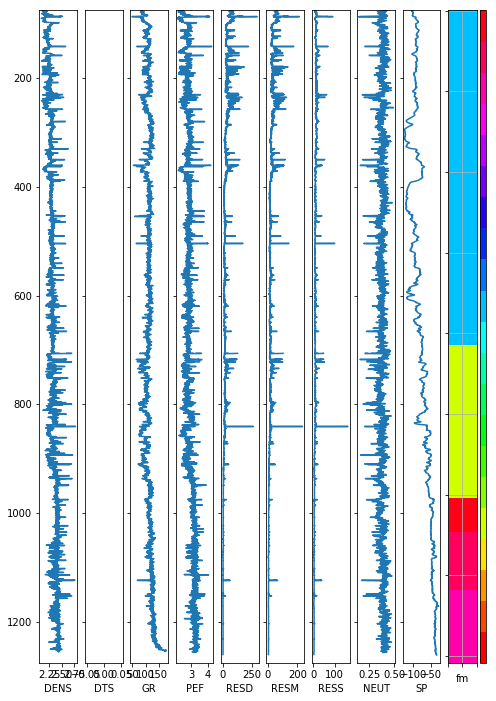

In [81]:
plotter(
    data=well,
    depth_col=[0],
    num_col=[3, 15, 6, 8, 9, 10, 11, 7, 12],
    cat_col=[13],
    cat_classes=[data.fm.unique().tolist()]
)

**Plotter bug**

Error when plotting sand/shale. Only show one color instead of 2 colors.

In [87]:
well['halfcolor'] = 'top'
well['halfcolor'].iloc[4042:] = 'bottom'

/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [89]:
well[well.halfcolor=='top'].tail()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,facies,lith,lith_pred,halfcolor
5754,690.280,8.5,8.325,2.326,0.001,107.350,118.535,0.388,2.752,19.570,16.413,9.296,-75.225,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,top
5755,690.432,8.5,8.294,2.314,0.001,105.691,121.819,0.378,2.801,20.745,17.421,9.549,-75.558,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Shale,Shale,top
5756,690.585,8.5,8.340,2.299,0.000,105.027,118.652,0.389,2.826,19.671,16.596,9.085,-75.592,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,top
5757,690.737,8.5,8.340,2.308,0.000,105.814,116.013,0.385,2.882,19.763,16.645,9.027,-75.238,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,top
5758,690.890,8.5,8.363,2.302,0.000,108.016,114.018,0.393,2.866,19.207,16.238,8.963,-75.329,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,top


In [91]:
well[well.halfcolor=='bottom'].head()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,facies,lith,lith_pred,halfcolor
5759,691.042,8.5,8.340,2.305,-0.001,108.060,115.426,0.389,2.851,19.902,16.767,9.154,-75.445,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,bottom
5760,691.194,8.5,8.340,2.323,-0.001,108.309,118.475,0.387,2.854,18.985,16.035,8.950,-75.487,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,bottom
5761,691.347,8.5,8.355,2.317,-0.001,105.902,118.995,0.386,2.749,19.167,16.168,8.811,-75.429,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,bottom
5762,691.499,8.5,8.271,2.320,-0.002,105.246,117.352,0.378,2.838,18.343,15.464,8.630,-75.404,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,bottom
5763,691.652,8.5,8.363,2.327,-0.003,105.476,119.113,0.360,2.877,19.175,16.166,8.950,-75.675,Matemateaonga Fm,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SH,Sand,Sand,bottom


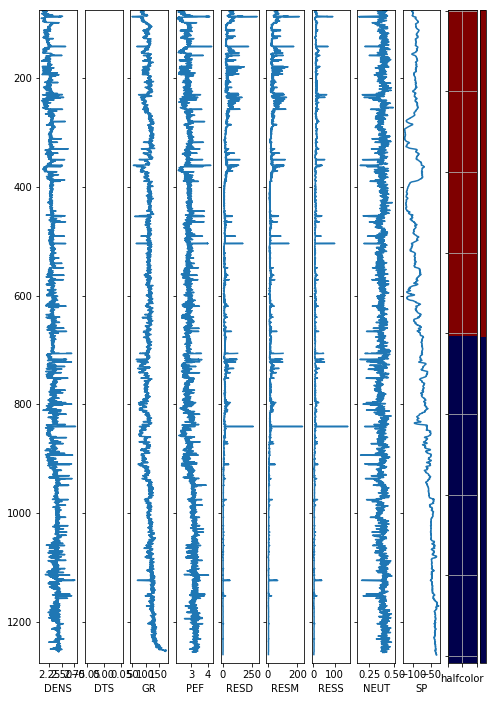

In [97]:
plotter(
    data=well,
    depth_col=[0],
    num_col=[3, 15, 6, 8, 9, 10, 11, 7, 12],
    cat_col=[-1],
    cat_classes=[['top','bottom']]
)